In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [37]:
path = "C:\\Users\\91897\\Downloads\\creditcard.csv"
data = pd.read_csv(path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
data.shape

(284807, 31)

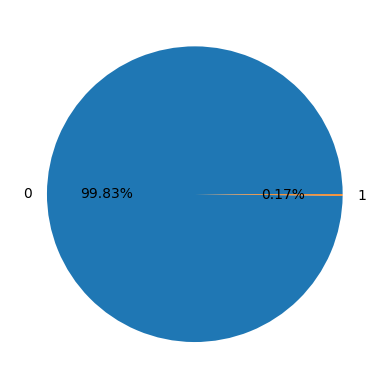

In [39]:
sizes = data['Class'].value_counts().values
lables = data['Class'].unique()

plt.pie(sizes,labels=lables, autopct='%.2f%%')
plt.show()

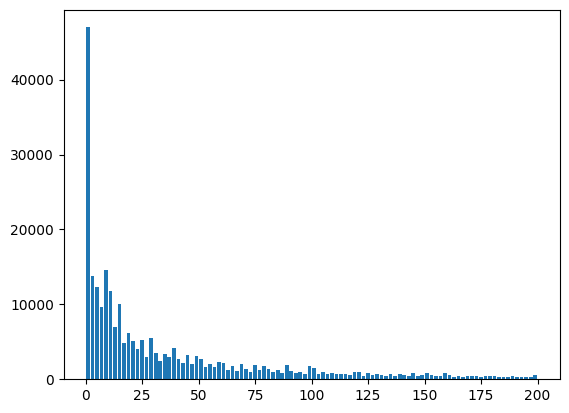

max amt:  25691.16
min amt:  0.0
90% of the  transactions have amt less than or equal to  203.0


In [40]:
amt = data['Amount']

plt.hist(amt[amt<200],100, rwidth=.8)
plt.show()

print("max amt: ", amt.max())
print("min amt: ", amt.min())
print("90% of the  transactions have amt less than or equal to ", np.percentile(amt,90))

In [41]:
from sklearn.preprocessing import normalize, StandardScaler

data.iloc[:,1:30] = StandardScaler().fit_transform(data.iloc[:,1:30])

X = data.iloc[:,1:30]
X = X.values

X = normalize(X)

y = data['Class'].values

X.shape, y.shape

((284807, 29), (284807,))

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [44]:
from sklearn.utils.class_weight import compute_sample_weight

w_weight = compute_sample_weight('balanced',y=y_train)

from sklearn.tree import DecisionTreeClassifier
ftree = DecisionTreeClassifier(max_depth=4,random_state=35)
ftree.fit(X_train, y_train, sample_weight=w_weight)
ftree

DecisionTreeClassifier(max_depth=4, random_state=35)

In [52]:
pred = ftree.predict(X_test)
len(pred[pred==1])

3561

In [53]:
len(y_test[y_test==1])

148

In [54]:
ftree.score(X_test,y_test)

0.9594466486429549

In [55]:
ftree.predict_proba(X_test)

array([[0.93939229, 0.06060771],
       [0.93939229, 0.06060771],
       [0.93939229, 0.06060771],
       ...,
       [0.93939229, 0.06060771],
       [0.93939229, 0.06060771],
       [0.93939229, 0.06060771]])

In [58]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, pred)
roc_auc

0.892002715535748

In [59]:
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(roc_auc))


[Scikit-Learn] ROC-AUC score : 0.892
